# Introduction to Machine Learning

In [1]:
!pip install numpy matplotlib scikit-learn


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from utils import plot_decision_boundary

Load the data:

In [3]:
n_samples = 100

X, y = datasets.make_circles(n_samples=n_samples, noise=0.1, factor=0.4)

Normalize the data and split in test and training set:

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


We first use a logisitic regression model to classify the data

In [5]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.37
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.31      0.34        16
           1       0.35      0.43      0.39        14

    accuracy                           0.37        30
   macro avg       0.37      0.37      0.37        30
weighted avg       0.37      0.37      0.36        30

Confusion Matrix:
[[ 5 11]
 [ 8  6]]


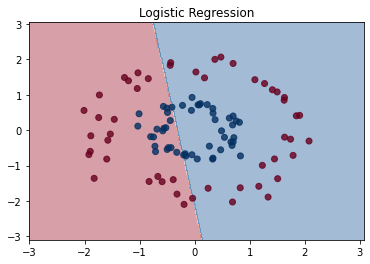

In [7]:
plt.title("Logistic Regression")
plot_decision_boundary(logistic_regression, X_scaled, y)

In [8]:
import plotly.graph_objects as go

def transform_to_3d(X):
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    z = np.exp(-4 * r**2)
    X_3d = np.column_stack((X, z))
    return X_3d

X_3d = transform_to_3d(X)

fig = go.Figure(data=[go.Scatter3d(x=X_3d[:, 0], y=X_3d[:, 1], z=X_3d[:, 2], mode='markers', marker=dict(size=5, color=y, colorscale='Spectral', opacity=0.8))])
fig.show()

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_3d)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
[[16  0]
 [ 1 13]]


### Can we perform this classification without having to increase the number of features?

In [11]:
n_samples = 100

X, y = datasets.make_circles(n_samples=n_samples, noise=0.1, factor=0.4)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Fit the model and predict the unobserved values:

In [12]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

Measure the performance of the model:

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.19      0.29        16
           1       0.48      0.86      0.62        14

    accuracy                           0.50        30
   macro avg       0.54      0.52      0.45        30
weighted avg       0.54      0.50      0.44        30

Confusion Matrix:
[[ 3 13]
 [ 2 12]]


Try different Kernels:

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

svms = {}

for kernel in kernels:
    svm = SVC(kernel=kernel, C=1)
    svm.fit(X_train, y_train)
    svms[kernel] = svm
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

print("Accuracy for Different Kernels:")
for kernel, accuracy in results.items():
    print(f"{kernel}: {accuracy:.2f}")

Accuracy for Different Kernels:
linear: 0.50
poly: 0.60
rbf: 1.00
sigmoid: 0.53


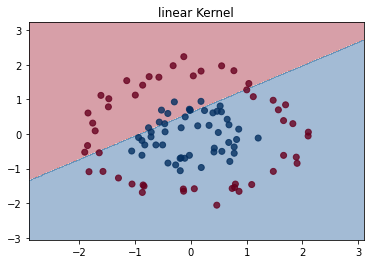

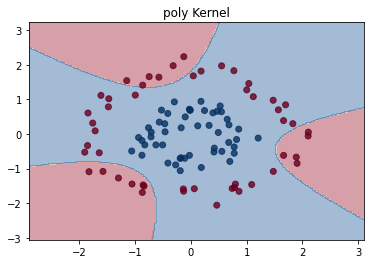

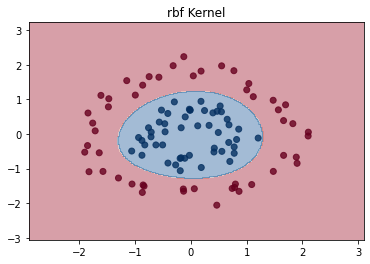

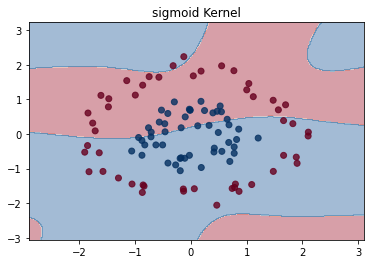

In [20]:
for kernel in kernels:
    plt.title(f"{kernel} Kernel")
    plot_decision_boundary(svms[kernel], X_scaled, y)

## Exercise: Kernel Comparison with Support Vector Machines

In this exercise, you will compare the performance of two different kernel functions in a Support Vector Machine (SVM) classifier. Your task is to fit both kernels to a dataset, evaluate the models, and determine which kernel performs better.

### Dataset 

- Iris dataset: A popular dataset for classification tasks that contains 150 samples of iris flowers, with four features (sepal length, sepal width, petal length, petal width) and three classes (setosa, versicolor, virginica). You can load this dataset from `sklearn.datasets` using `load_iris()`.

### Instructions:

1. Import the necessary modules and functions.
2. Load the dataset and explore its features and target classes (pick only two classes for this exercise).
3. Preprocess the data (e.g., scale the features using `StandardScaler`).
4. Split the data into training and test sets using train_test_split.
5. Train two SVM classifiers with different kernel functions (e.g., 'linear' and 'rbf') using SVC.
6. Evaluate the performance of each classifier on the test set using metrics like accuracy, precision, recall, and F1-score (use `accuracy_score`, `classification_report`, and other relevant functions from `sklearn.metrics`).
7. Compare the performance of both classifiers and determine which kernel function performs better.

In [16]:
## Write your solution here

In [21]:
# Part 1. Load the dataset with the function load_iris from sklearn.datasets
X, y = datasets.load_iris(return_X_y=True)
X = X[:, :2]
X = X[y < 2]
y = y[y < 2]

In [18]:
# Part 2. Scale the dataset and split it into train and test sets 

In [19]:
# Part 3. Train two classifiers